#### Ioana
 
1. "how did you pick the question(s) that you did?"
By performing a basic EDA on our available data and using the correlation matrix to find the most likely candidate. 

2. "why are these questions important from a business perspective?"
3. "how did you decide on the data cleaning options you performed?"
4. "why did you choose a given method or library?"
5. "why did you select those visualizations and what did you learn from each of them?"
6. "why did you pick those features as predictors?"
7. "how would you interpret the results?"
8. "how confident are you in the predictive quality of the results?"
9. "what are some of the things that could cause the results to be wrong?"


Carter

Questions:
    1) Is year rennovated a good indicator of price?
            - Is it worth completing a new renovation soon or selling the house?
            - how much does a rennovation typically add in value
            
    2)Is square footage a good indication of price
            - what is the level of spending on square footage (during building or rennovation) that will typically lead to a profit when selling the house)
            
    3)Is location a good indication of price 
            - If building houses at the same cost, how much will location be a factor
            - Is this a good indication for maximising profits for a development company
   
            
    4) Is location a good indicator or sales
            - where should a real estate firm focus on marketing?

    * "how did you pick the question(s) that you did?"
    
    Largely we imagined what kind of comapnies would be analysing this kind of data:
        - City planners
        - real estate companies focussed on sales
        - housing development firms focussed on maximising price and minimising cost
        
    * "why are these questions important from a business perspective?"
    
    (slightly answered in bullet points below questions)
    These questions are relevant for maximising profit margin, through cost minimisation in building or targetting marketing.
    
    TO DO//
    * "how did you decide on the data cleaning options you performed?"
    * "why did you choose a given method or library?"
    * "why did you select those visualizations and what did you learn from each of them?"
    
       We plotted scatter matrixes to give a quick visual into parameters that may have been related. On top of that, to get a clearer picture we produced a correlation heatmap to check for real correlation of various variables on price.
       
    * "why did you pick those features as predictors?"
    
    Relevant in both a business setting and found that there was a correlation worth exploring following plotting the heatmap
    
    
    TO DO//
    * "how would you interpret the results?"
    * "how confident are you in the predictive quality of the results?"
    * "what are some of the things that could cause the results to be wrong?"


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
len(df)

21597

In [6]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [7]:
df['yr_built'].head()

0    1955
1    1951
2    1933
3    1965
4    1987
Name: yr_built, dtype: int64

In [8]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [ ]:
# To give us a bird's eye overview of the data, we plotted a scatter matrix, paying particular attention to anything
# that correlated with price and a heatmap to find the highest coefficients

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


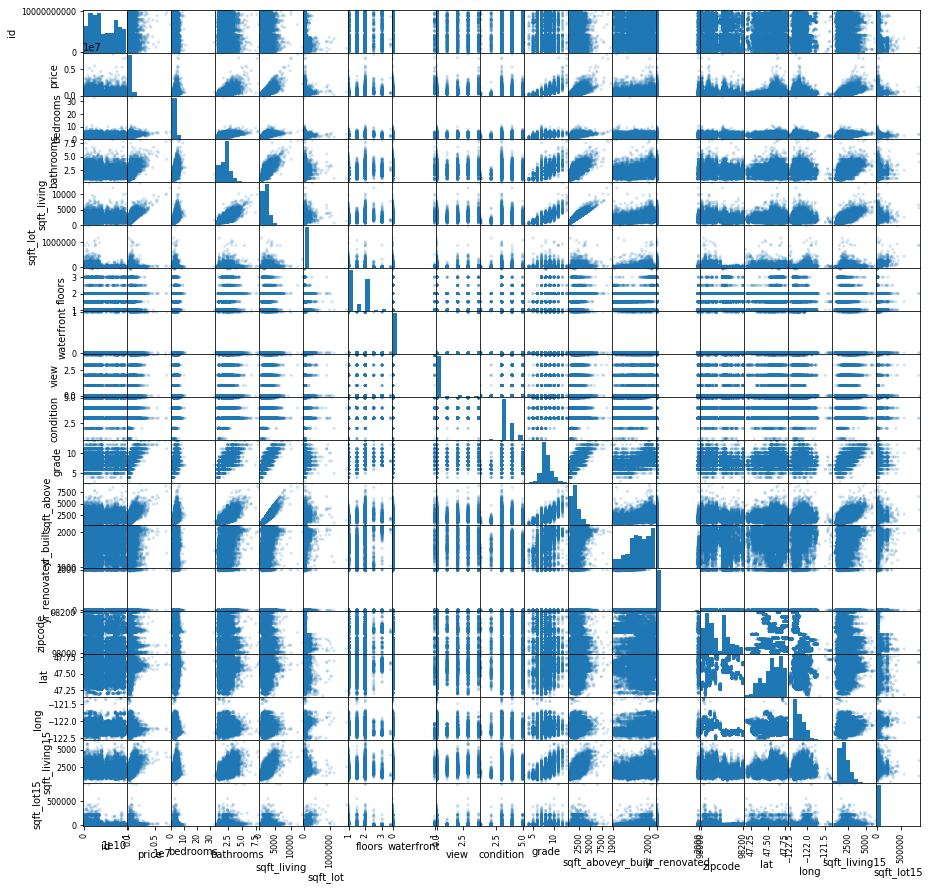

In [23]:
pd.scatter_matrix(df, alpha = 0.2, figsize = (15,15))
plt.show()

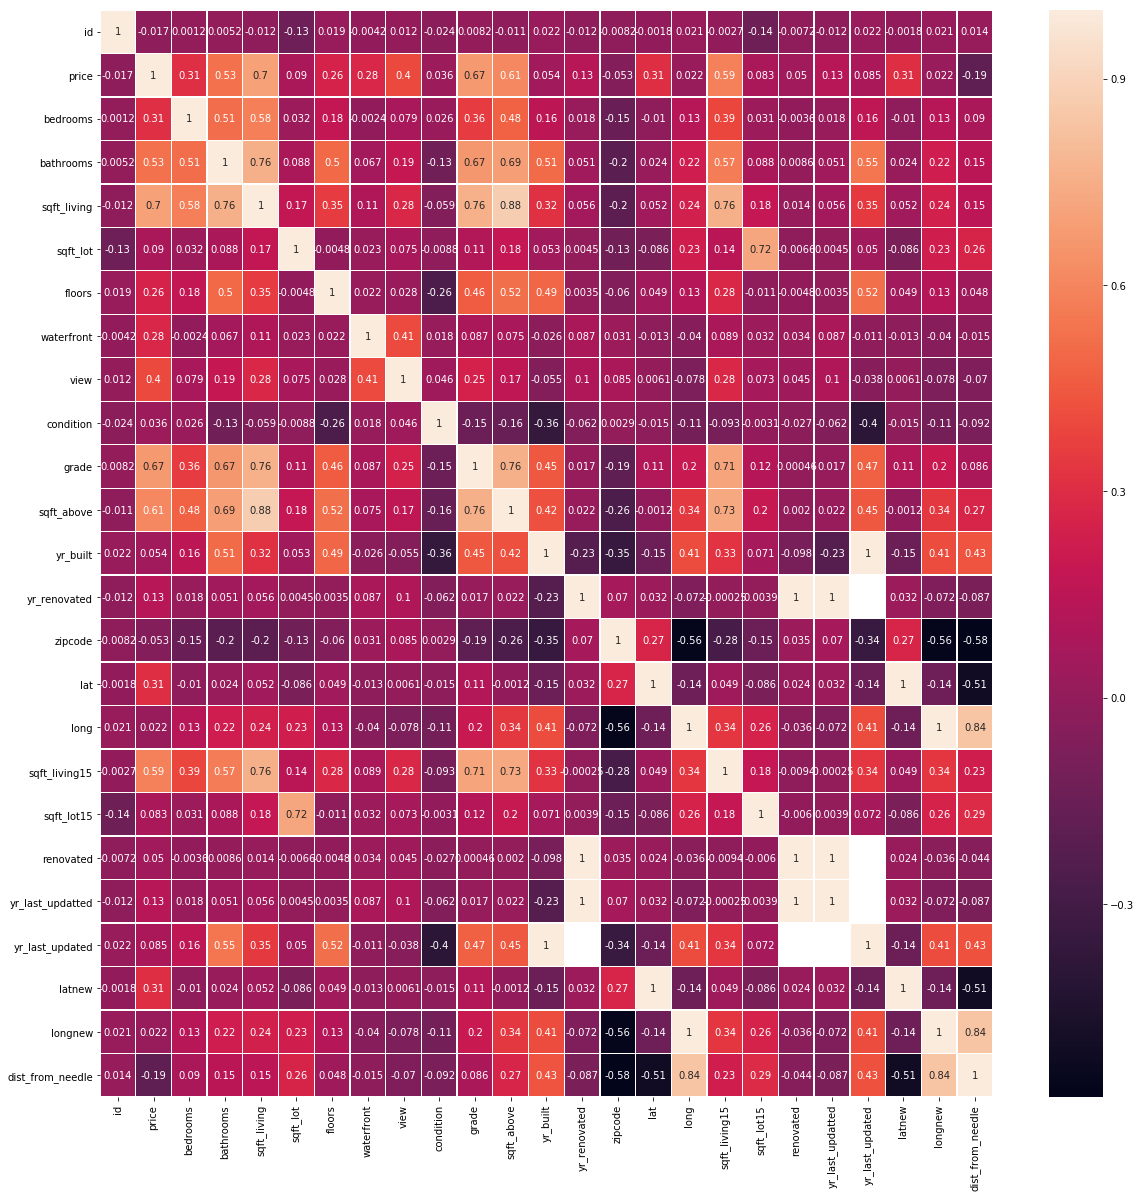

In [98]:
fig, ax =  plt.subplots(figsize=(20,20))
matrix = df.corr()
sns.heatmap(matrix, annot=True, linewidths = 0.4, ax = ax)

In [ ]:
# Our heatmap showed that grade, sqft_living and 

In [10]:
df['yr_renovated'].head()

0       0.0
1    1991.0
2       NaN
3       0.0
4       0.0
Name: yr_renovated, dtype: float64

In [11]:
df.isna().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [15]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [16]:
## Initial probe into (yr renovated, sqft living, grade)
## subset of year renovated - has there been a renovation?

In [17]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [18]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [19]:
df.loc[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [20]:
df.loc[df['bathrooms'] == 7.75]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.24,4540,42730


In [26]:
df.loc[df['yr_renovated'] != 0].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1
12,114101516,5/28/2014,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,...,1430,0.0,1927,NaN,98028,47.7558,-122.229,1780,12697,1
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,0.0,...,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386,1
26,1794500383,6/26/2014,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,...,1750,700.0,1915,NaN,98119,47.6386,-122.360,1760,3573,1


In [ ]:
# adding a new column for whether a house has been renovated or not

In [22]:
df['renovated'] = ''

In [23]:
df.loc[(df['yr_renovated'] != 0), 'renovated'] = 1

In [24]:
df.loc[(df['yr_renovated'] == 0), 'renovated'] = 0

In [25]:
df['renovated'].head()

0    0
1    1
2    1
3    0
4    0
Name: renovated, dtype: int64

In [27]:
# adding a column for 'year last modified' - houses with value zero for renovation will have their yr_built
# value instead

df['yr_last_updatted'] = df['yr_renovated']
df.loc[(df['yr_renovated'] == 0), 'yr_last_updated'] = df.loc[(df['yr_renovated']) == 0]['yr_built']

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


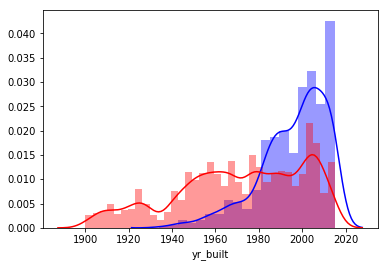

In [41]:
sns.distplot(df.loc[df['renovated'] == 1]['yr_renovated'].dropna(), color='blue')
sns.distplot(df.yr_built, color = 'red')
plt.show()

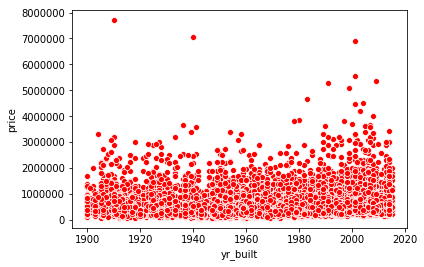

In [51]:
sns.scatterplot(x=df['yr_built'], y = df['price'], color = 'red')

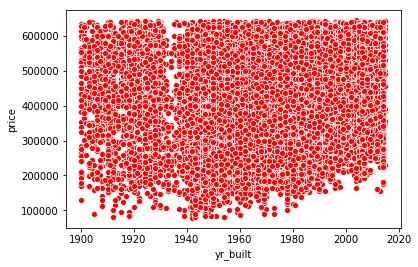

In [50]:

sns.scatterplot(x=df.loc[df.price < 645000]['yr_built'], y = df.loc[df.price < 645000]['price'], color = 'red')

In [ ]:
# After attempting to plot with the full data for prices and yr_built we have replotted with outliers removed.
# However, this did not reveal any meaningful patterns, so 

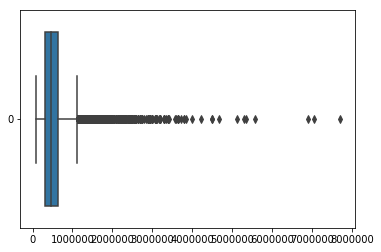

In [47]:
sns.boxplot(data = df.loc[df.price < 645000], orient = 'h')

In [48]:
df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

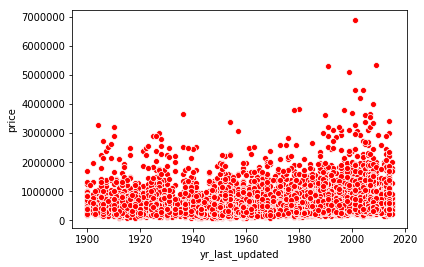

In [52]:
sns.scatterplot(x=df['yr_last_updated'], y = df['price'], color = 'red')

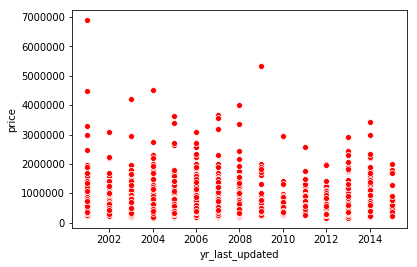

In [56]:
sns.scatterplot(x=df.loc[( (df.yr_last_updated > 2000))]['yr_last_updated'], y = df.loc[((df.yr_last_updated > 2000))]['price'], color = 'red')

In [ ]:
# using our updated list ('yr_last_updated') we've found a potentially more meaningfu pattern. However, 
# upon further inspection the age of update doesn't seem to dictate the price. 

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


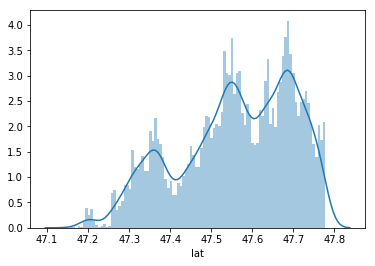

In [77]:
sns.distplot(df.lat,bins=100)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


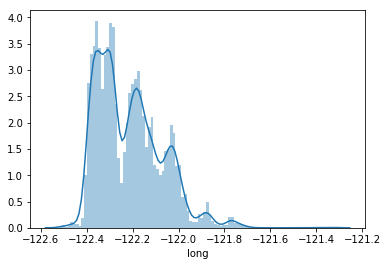

In [78]:
sns.distplot(df.long, bins=100)

In [ ]:
# Looking at our distribution for latitude, we can see that the number of house sales in our data are skewed towards
# the North of King County, Seattle. Also the distribution of houses along longitudinal lines conforms to our 
# expectations, given that Seattle is in the West of the county. Below we also plotted a scatter of the latitude
# versus the price, given that the correlation between the two is 0.31. 

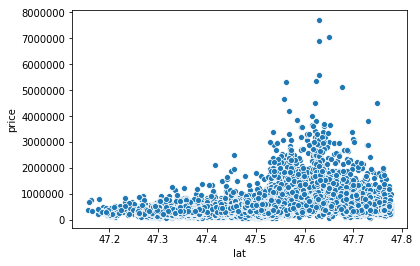

In [70]:
sns.scatterplot(x = df.lat, y = df.price)

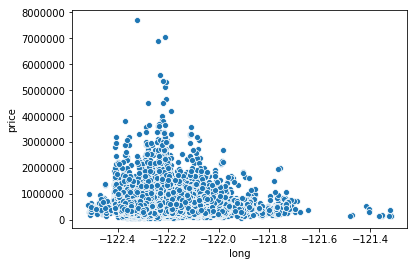

In [71]:
sns.scatterplot(x = df.long, y = df.price)

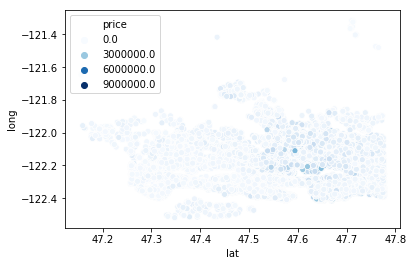

In [72]:
sns.scatterplot(x=df.lat, y=df.long, hue=df.price, palette='Blues')

In [ ]:
# given that the coordinates are in decimal, we've added two new coordinate columns so that we can convert the values
# to DMS format at a latter stage

In [79]:
df['latnew'] = df['lat']
df['longnew'] = df['long']

In [90]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,renovated,yr_last_updatted,yr_last_updated,latnew,longnew,dist_from_needle
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,47.5112,-122.257,1340,5650,0,0.0,1955.0,47.5112,-122.257,169.860583
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,47.7210,-122.319,1690,7639,1,1991.0,NaN,47.7210,-122.319,170.070361
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,47.7379,-122.233,2720,8062,1,NaN,NaN,47.7379,-122.233,170.087298
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,47.5208,-122.393,1360,5000,0,0.0,1965.0,47.5208,-122.393,169.870164
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,47.6168,-122.045,1800,7503,0,0.0,1987.0,47.6168,-122.045,169.966431


In [91]:
needle_lat = 47.620422
needle_long = -122.349358
df['dist_from_needle'] = np.sqrt((df.long - needle_long)**2 + (df.lat - needle_lat)**2)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


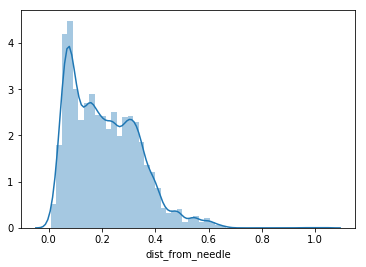

In [92]:
sns.distplot(df.dist_from_needle)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


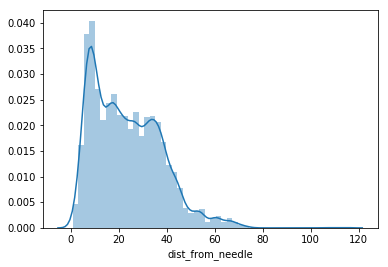

In [96]:
sns.distplot(111*df.dist_from_needle)

In [93]:
df.dist_from_needle.describe()

count    21597.000000
mean         0.210414
std          0.129193
min          0.007345
25%          0.097727
50%          0.192295
75%          0.301784
max          1.038493
Name: dist_from_needle, dtype: float64

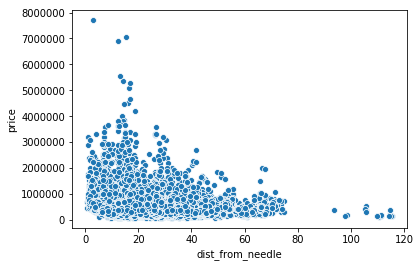

In [97]:
sns.scatterplot(x=111*df.dist_from_needle, y = df.price)

In [100]:
df.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64